In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
df = pd.read_csv("results/csv_systematic.txt")
df = df[df['CSV_err']<0.1]
df.describe()


,Q2,xbj,xbj_corr,rho_coe,CSV,CSV_err
count,51.000000,51.000000,51.000000,51.0,51.000000,51.000000
mean,4.705882,0.489706,0.489233,-1.0,0.084155,0.040814
std,0.607672,0.087917,0.081216,0.0,0.076416,0.020713
min,4.000000,0.325000,0.334279,-1.0,-0.062720,0.018423
25%,4.000000,0.425000,0.433861,-1.0,0.033806,0.027977
50%,4.750000,0.475000,0.486372,-1.0,0.090942,0.031085
75%,5.500000,0.575000,0.564094,-1.0,0.121618,0.051303
max,5.500000,0.625000,0.614328,-1.0,0.290667,0.096553


In [2]:
import statistics 
xs_one = df[df['Q2']==4].sort_values('xbj')['xbj'].unique()

CSV_one = []
CSV_one_stat = []
CSV_one_sys = []

for ix in xs_one:
    CSVs = df[df['Q2']==4][df['xbj']==ix]['CSV']
    mean = statistics.mean(CSVs)
    std = statistics.stdev(CSVs)
    CSVs_errs = df[df['Q2']==4][df['xbj']==ix]['CSV_err']
    err_mean = statistics.mean(CSVs_errs)
    #print(mean)
    #print(std)
    CSV_one.append(mean)
    CSV_one_stat.append(err_mean)
    CSV_one_sys.append(std)
print(xs_one)
print(CSV_one)
print(CSV_one_stat)
print(CSV_one_sys)

[0.325 0.375 0.425 0.475 0.525 0.575]
[0.23400707098803916, 0.16360296398243854, 0.18822510390331618, 0.1074327711920874, 0.092924472628161, 0.0013945398450457339]
[0.0715284375054263, 0.03886145406259473, 0.03084771443394217, 0.0306742052193969, 0.04982179863820257, 0.09319528913053467]
[0.050657038108462546, 0.03474870600041502, 0.021160874299184083, 0.015133727876245801, 0.015568965177851139, 0.015764204301532664]


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_72440/196068068.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  CSVs = df[df['Q2']==4][df['xbj']==ix]['CSV']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_72440/196068068.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  CSVs_errs = df[df['Q2']==4][df['xbj']==ix]['CSV_err']


In [3]:

def delta_udv(parameter):
    #x = np.arange(0.2,0.7,0.01)
    x = np.linspace(0.2,0.7,50)
    return parameter*(1-x)**4*x**-0.5*(x-0.0909)
#x_axis = np.arange(0.2,0.7,0.01)
x_axis = np.linspace(0.2,0.7,50)
y_delta_uv = delta_udv(-0.2)
y_delta_dv = delta_udv(0.2)
y_delta_uv_up = delta_udv(0.8)
y_delta_uv_low = delta_udv(-0.8)
y_delta_dv_up = delta_udv(-0.65)
y_delta_dv_low = delta_udv(0.65)

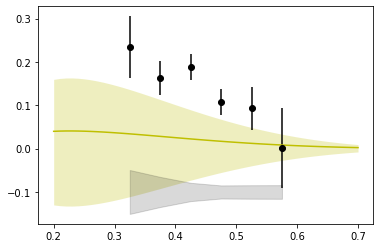

In [4]:
fig, ax = plt.subplots()
ax.fill_between(x_axis,y_delta_uv_up-y_delta_uv_low,y_delta_dv_up-y_delta_dv_low,color = 'y',alpha=.25, linewidth=0)
ax.plot(x_axis,y_delta_dv-y_delta_uv,label = 'MRST',color = 'y')

plt.errorbar(xs_one,CSV_one,CSV_one_stat,fmt = 'o',color = 'k')
plt.fill_between(xs_one,-0.1-np.asarray(CSV_one_sys),-0.1+np.asarray(CSV_one_sys),alpha = 0.15,color = 'k')

In [5]:
import statistics 
xs_two = df[df['Q2']==4.75].sort_values('xbj')['xbj'].unique()

CSV_two = []
CSV_two_stat = []
CSV_two_sys = []

for ix in xs_two:
    CSVs = df[df['Q2']==4.75][df['xbj']==ix]['CSV']
    mean = statistics.mean(CSVs)
    std = statistics.stdev(CSVs)
    CSVs_errs = df[df['Q2']==4.75][df['xbj']==ix]['CSV_err']
    err_mean = statistics.mean(CSVs_errs)
    #print(mean)
    #print(std)
    CSV_two.append(mean)
    CSV_two_stat.append(err_mean)
    CSV_two_sys.append(std)
print(xs_two)
print(CSV_two)
print(CSV_two_stat)
print(CSV_two_sys)

[0.375 0.425 0.475 0.525 0.575 0.625]
[-0.04229507250984346, 0.11395128228668668, 0.12948665772188012, 0.10870831898371193, 0.06470580852985253, -0.052927647035290896]
[0.05008385216339736, 0.02996896182568933, 0.021471428418482333, 0.020807469312799868, 0.030313268974533, 0.06252962488798507]
[0.03397244463006208, 0.029160576415029876, 0.01920332078563571, 0.014639938948691226, 0.011007007491127818, 0.012610964078941196]


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_72440/2934777639.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  CSVs = df[df['Q2']==4.75][df['xbj']==ix]['CSV']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_72440/2934777639.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  CSVs_errs = df[df['Q2']==4.75][df['xbj']==ix]['CSV_err']


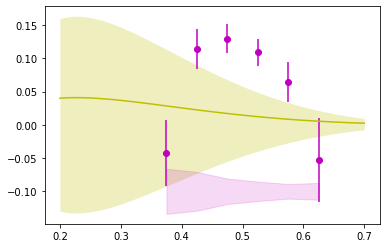

In [6]:
fig, ax = plt.subplots()
ax.fill_between(x_axis,y_delta_uv_up-y_delta_uv_low,y_delta_dv_up-y_delta_dv_low,color = 'y',alpha=.25, linewidth=0)
ax.plot(x_axis,y_delta_dv-y_delta_uv,label = 'MRST',color = 'y')

plt.errorbar(xs_two,CSV_two,CSV_two_stat,fmt = 'o',color = 'm')
plt.fill_between(xs_two,-0.1-np.asarray(CSV_two_sys),-0.1+np.asarray(CSV_two_sys),alpha = 0.15,color = 'm')

In [7]:
import statistics 
xs_three = df[df['Q2']==5.5].sort_values('xbj')['xbj'].unique()

CSV_three = []
CSV_three_stat = []
CSV_three_sys = []

for ix in xs_three:
    CSVs = df[df['Q2']==5.5][df['xbj']==ix]['CSV']
    mean = statistics.mean(CSVs)
    std = statistics.stdev(CSVs)
    CSVs_errs = df[df['Q2']==5.5][df['xbj']==ix]['CSV_err']
    err_mean = statistics.mean(CSVs_errs)
    #print(mean)
    #print(std)
    CSV_three.append(mean)
    CSV_three_stat.append(err_mean)
    CSV_three_sys.append(std)
print(xs_three)
print(CSV_three)
print(CSV_three_stat)
print(CSV_three_sys)

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_72440/4208003165.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  CSVs = df[df['Q2']==5.5][df['xbj']==ix]['CSV']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_72440/4208003165.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  CSVs_errs = df[df['Q2']==5.5][df['xbj']==ix]['CSV_err']


[0.425 0.475 0.525 0.575 0.625]
[0.05610228771230796, 0.09046509172213413, 0.08337853275750903, 0.0691429889317605, 0.0223356173879483]
[0.06215807602622927, 0.0281760696641333, 0.01882405469289423, 0.019177930457803635, 0.03540357407200523]
[0.04027963113048234, 0.014787539009489157, 0.01320090519128285, 0.010107936688675703, 0.009562214787218835]


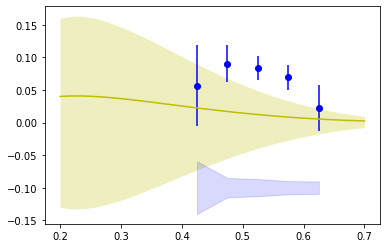

In [8]:
fig, ax = plt.subplots()
ax.fill_between(x_axis,y_delta_uv_up-y_delta_uv_low,y_delta_dv_up-y_delta_dv_low,color = 'y',alpha=.25, linewidth=0)
ax.plot(x_axis,y_delta_dv-y_delta_uv,label = 'MRST',color = 'y')

plt.errorbar(xs_three,CSV_three,CSV_three_stat,fmt = 'o',color = 'b')
plt.fill_between(xs_three,-0.1-np.asarray(CSV_three_sys),-0.1+np.asarray(CSV_three_sys),alpha = 0.15,color = 'b')

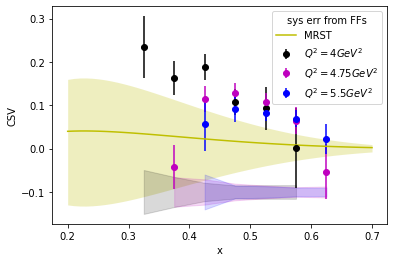

In [9]:
fig, ax = plt.subplots()
ax.fill_between(x_axis,y_delta_uv_up-y_delta_uv_low,y_delta_dv_up-y_delta_dv_low,color = 'y',alpha=.25, linewidth=0)
ax.plot(x_axis,y_delta_dv-y_delta_uv,label = 'MRST',color = 'y')

plt.errorbar(xs_one,CSV_one,CSV_one_stat,fmt = 'o',color = 'k',label = r'$Q^2 = 4GeV^2$')
plt.fill_between(xs_one,-0.1-np.asarray(CSV_one_sys),-0.1+np.asarray(CSV_one_sys),alpha = 0.15,color = 'k')

plt.errorbar(xs_two,CSV_two,CSV_two_stat,fmt = 'o',color = 'm',label = r'$Q^2 = 4.75GeV^2$')
plt.fill_between(xs_two,-0.1-np.asarray(CSV_two_sys),-0.1+np.asarray(CSV_two_sys),alpha = 0.15,color = 'm')

plt.errorbar(xs_three,CSV_three,CSV_three_stat,fmt = 'o',color = 'b',label = r'$Q^2 = 5.5GeV^2$')
plt.fill_between(xs_three,-0.1-np.asarray(CSV_three_sys),-0.1+np.asarray(CSV_three_sys),alpha = 0.15,color = 'b')

plt.xlabel('x')
plt.ylabel('CSV')
plt.legend()
plt.legend(title = 'sys err from FFs')
plt.savefig('results/CSV_sys_err_from_FFs.pdf')